In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F3( N features ) → F1( 2N/3 features out of selected features from F3) →    
##           F2(N/3 features out of selected features from F1)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [5]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [6]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [7]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [8]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [11]:
y_train.shape, y_test.shape

((57,), (15,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns
print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Feature Selection Using T-Test

In [13]:
start_time_t = time.time()
x= df.values               # It is converting df into numpy arrray

a,b = x.shape             # Here, a is taking row and b is taking columns of x

n1 =0;
n2 = 0;

for i in range(a):        # It is calculating size of each class label
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

# It is calculating t-test

for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 1:           
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])


    # It is converting sample values from string to integer
    sample1 = list(map(int,sample1))       
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)          
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)      
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        #It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample1.clear()      
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]    #It is increasing sorted index by 1 because  we have to fetch it from dataframe for corresponding columns

new_index.reverse()     

required_features_t = new_index[:number_of_features_required_1]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :5.918704271316528 seconds


In [14]:
print(required_features_t)

[3151, 1727, 4969, 1934, 3545, 4531, 1228, 4570, 3054, 850, 1711, 1790, 601, 5139, 3629, 2377, 5043, 4212, 636, 4863, 4026, 1413, 1437, 1489, 3234, 796, 4407, 1549, 1336, 3776, 3933, 4091, 3030, 1194, 4572, 3617, 4062, 1270, 1331, 3066, 1674, 3431, 3177, 1224, 1396, 88, 2722, 346, 1375, 1830, 1556, 3371, 4381, 4550, 909, 1721, 524, 2424, 953, 412, 3266, 2904, 926, 3311, 1789, 3834, 3252, 4711, 3144, 4928, 4623, 1170, 4710, 5008, 3123, 307, 1564, 1666, 1919, 2563, 406, 4487, 1999, 3076, 1735, 4111, 3350, 1530, 3241, 3851, 4159, 2805, 3694, 371, 798, 2764, 3259, 3195, 4738, 2860, 2695, 1394, 2994, 2319, 2540, 944, 674, 2005, 3022, 3607, 4086, 4420, 997, 1480, 2919, 495, 4643, 3148, 159, 4500, 3793, 2085, 153, 3873, 3592, 1183, 3599, 889, 1770, 4902, 1779, 2497, 4931, 4412, 3187, 2354, 1008, 1814, 4364, 835, 4992, 4780, 1242, 2897, 4925, 2477, 2295, 3028, 4929, 1135, 3745, 1293, 1025, 3242, 2709, 2239, 3401, 1174, 1313, 4739, 3727, 31, 3153, 4514, 2435, 4880, 2769, 2329, 1387, 2124, 1864,

In [15]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  3431


In [16]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['X59417_at', 'M92287_at', 'M31523_at', 'U05259_rna1_at', 'X95735_at', 'M84371_rna1_s_at', 'M11722_at', 'M31211_s_at', 'X17042_at', 'J05243_at', 'M89957_at', 'S50223_at', 'D88270_at', 'U29175_at', 'Y08612_at', 'U46499_at', 'M28170_at', 'U22376_cds2_s_at', 'HG1612-HT1612_at', 'X97267_rna1_s_at', 'Z15115_at', 'M31303_rna1_at', 'M33680_at', 'M55150_at', 'X66401_cds1_at', 'J03473_at', 'L09209_s_at', 'M62762_at', 'M23197_at', 'Z49194_at', 'U07139_at', 'D26156_s_at', 'X15414_at', 'L47738_at', 'M65214_s_at', 'Y07604_at', 'L06797_s_at', 'M16038_at', 'M22960_at', 'X51521_at', 'M84526_at', 'X82240_rna1_at', 'X61587_at', 'M11147_at', 'M29696_at', 'AF009426_at', 'U77948_at', 'D49950_at', 'M27891_at', 'S76617_at', 'M63138_at', 'X78669_at', 'M32304_s_at', 'M27504_s_at', 'L07633_at', 'M91432_at', 'D86967_at', 'U50136_rna1_at', 'L13278_at', 'D63880_at', 'X69111_at', 'U94855_at', 'L09717_at', 'X74262_at', 'S46622_at', 'D38073_at', 'X67951_at', 'U18271_cds3_s_at', 'X58529_at', 'L4

In [17]:
X_train1 = X_train.iloc[:,required_features_t]
X_train1.head()

,X59434_at,M92303_at,M31932_at,U05291_at,X96381_rna1_at,M21142_cds2_s_at,M11726_at,M31241_s_at,X17094_at,J05249_at,...,L05624_s_at,L78833_cds1_at,Z48501_s_at,M63582_at,X66141_at,U35048_at,U82275_at,U31903_s_at,J02888_at,U62961_at
55,0.408145,-0.580525,-1.058378,-0.478810,0.697176,-1.837563,-0.736494,0.009076,-0.673224,-0.840302,...,0.975946,-0.151753,-0.844328,-0.409404,-0.354113,-0.488018,-0.180350,-0.080258,-0.344649,-1.171468
70,0.208701,2.812671,-0.976641,2.893675,-1.289414,-1.161750,1.140880,1.361020,-0.532947,1.265147,...,-3.813462,1.381749,-0.498627,-0.481827,3.576312,-0.079846,-0.723858,3.566681,2.930669,-0.606401
62,0.429139,-0.902329,-0.393721,-1.302209,0.966327,-0.859030,0.310883,3.591730,-0.236452,0.302602,...,0.994496,-0.381778,-0.699685,1.057866,0.416828,-0.608745,0.759202,-0.618721,0.191985,-1.723977
43,2.675505,1.513235,0.774268,4.402418,-0.270486,-0.849721,-0.097528,0.347062,-1.298095,1.549923,...,0.990786,0.908920,-1.014320,0.225473,-0.966736,-0.861696,-0.511089,3.499968,0.901329,-0.380374
4,-0.793765,-1.036753,-0.423835,-0.232283,-1.238148,-0.131460,-0.855065,-1.117545,-0.379917,0.165909,...,1.090952,1.177282,0.199236,-0.291834,0.072658,0.878783,-0.230909,-1.635289,-0.289135,0.310264


# Selection of features using Mutual Information 

In [18]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values
  
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
    
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))

    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    
    n_x_i=len(n_x[pt[1]])
  
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [19]:
X_train_tp=X_train1.values.transpose()
mi_start_time = time.time()

total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.17758207829536746
Mutual Information between Gene and Feature_hum_alu_at :  0.045614242927269594
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.06730760517790733
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.0021793883082043795
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.0377650258675262
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.06679750869257865
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.06381273684381567
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.03986757544928567
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.12278469553433655
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.012748275366276797
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.0010765645090305858
Mutual Information be

Mutual Information between Gene and Feature_D13264_at :  0.08602180753516185
Mutual Information between Gene and Feature_D13315_at :  0.0737269629823067
Mutual Information between Gene and Feature_D13370_at :  0.14824254284659114
Mutual Information between Gene and Feature_D13435_at :  0.04590393674880485
Mutual Information between Gene and Feature_D13540_at :  0.052485020643864545
Mutual Information between Gene and Feature_D13626_at :  0.035606828260397676
Mutual Information between Gene and Feature_D13627_at :  0.03192845366721939
Mutual Information between Gene and Feature_D13628_at :  0.03876378983864604
Mutual Information between Gene and Feature_D13630_at :  0.027114907740220483
Mutual Information between Gene and Feature_D13633_at :  0.030738692690386423
Mutual Information between Gene and Feature_D13634_at :  0.028119512855140073
Mutual Information between Gene and Feature_D13635_at :  0.07217338423382999
Mutual Information between Gene and Feature_D13636_at :  0.1060862027413

Mutual Information between Gene and Feature_D30037_at :  0.2510165483469659
Mutual Information between Gene and Feature_D30655_at :  0.038967454043638605
Mutual Information between Gene and Feature_D30742_at :  0.008854925246899233
Mutual Information between Gene and Feature_D30755_at :  0.09491897118955037
Mutual Information between Gene and Feature_D30756_at :  0.06875365219669533
Mutual Information between Gene and Feature_D30758_at :  0.0006723376069252366
Mutual Information between Gene and Feature_D31716_at :  0.00940793328931577
Mutual Information between Gene and Feature_D31762_at :  0.014339180841943702
Mutual Information between Gene and Feature_D31763_at :  0.020854578123609326
Mutual Information between Gene and Feature_D31764_at :  0.0032093038118041137
Mutual Information between Gene and Feature_D31765_at :  0.043294780520209165
Mutual Information between Gene and Feature_D31766_at :  0.017261696922354533
Mutual Information between Gene and Feature_D31767_at :  0.04085435

Mutual Information between Gene and Feature_D61380_at :  0.09419971175267648
Mutual Information between Gene and Feature_D61391_at :  0.07003752738395794
Mutual Information between Gene and Feature_D63135_at :  0.09533868640273142
Mutual Information between Gene and Feature_D63160_at :  0.03410466547341964
Mutual Information between Gene and Feature_D63390_at :  0.2204881975172761
Mutual Information between Gene and Feature_D63391_at :  0.05718829085051088
Mutual Information between Gene and Feature_D63412_at :  0.05962031296518109
Mutual Information between Gene and Feature_D63475_at :  0.10415655344326427
Mutual Information between Gene and Feature_D63476_at :  0.030243986535341313
Mutual Information between Gene and Feature_D63477_at :  0.015436887421985119
Mutual Information between Gene and Feature_D63478_at :  0.08761702391082288
Mutual Information between Gene and Feature_D63480_at :  0.05911766007306583
Mutual Information between Gene and Feature_D63481_at :  0.1161294556480844

Mutual Information between Gene and Feature_D86960_at :  0.06538874230703207
Mutual Information between Gene and Feature_D86961_at :  0.016523029648735334
Mutual Information between Gene and Feature_D86962_at :  0.027190865961445102
Mutual Information between Gene and Feature_D86963_at :  0.015306149461281317
Mutual Information between Gene and Feature_D86964_at :  0.019983440980678103
Mutual Information between Gene and Feature_D86965_at :  0.01646716247892631
Mutual Information between Gene and Feature_D86966_at :  0.012705774260286984
Mutual Information between Gene and Feature_D86967_at :  0.012292188160276087
Mutual Information between Gene and Feature_D86968_at :  0.06950404521733439
Mutual Information between Gene and Feature_D86969_at :  0.00039230184088514256
Mutual Information between Gene and Feature_D86970_at :  0.0009956305454992848
Mutual Information between Gene and Feature_D86971_at :  0.2034587459028184
Mutual Information between Gene and Feature_D86972_at :  0.0749401

Mutual Information between Gene and Feature_HG2417-HT2513_at :  0.007791985633757806
Mutual Information between Gene and Feature_HG2442-HT2538_at :  0.011888875979236805
Mutual Information between Gene and Feature_HG2460-HT2556_at :  0.011537497338384453
Mutual Information between Gene and Feature_HG2463-HT2559_at :  0.10011323675994119
Mutual Information between Gene and Feature_HG2480-HT2576_at :  0.01113691068920913
Mutual Information between Gene and Feature_HG2525-HT2621_at :  0.05938572723624484
Mutual Information between Gene and Feature_HG2538-HT2634_at :  0.015481923979161117
Mutual Information between Gene and Feature_HG2566-HT4867_at :  0.04001484177018547
Mutual Information between Gene and Feature_HG2573-HT2669_at :  0.14414675673943908
Mutual Information between Gene and Feature_HG2614-HT2710_at :  0.0096699852826697
Mutual Information between Gene and Feature_HG2663-HT2759_at :  0.024760630737077786
Mutual Information between Gene and Feature_HG2668-HT2764_at :  0.019417

Mutual Information between Gene and Feature_L04490_at :  0.07312911339322047
Mutual Information between Gene and Feature_L04510_at :  0.029372621345090732
Mutual Information between Gene and Feature_L04656_at :  0.0070685862261478105
Mutual Information between Gene and Feature_L04733_at :  0.13682678096112275
Mutual Information between Gene and Feature_L04953_at :  0.03164499599607052
Mutual Information between Gene and Feature_L05148_at :  0.07826794219332014
Mutual Information between Gene and Feature_L05424_cds2_at :  0.1554044824103557
Mutual Information between Gene and Feature_L05425_at :  0.017170276905904135
Mutual Information between Gene and Feature_L05512_at :  0.02236552498569904
Mutual Information between Gene and Feature_L05779_at :  0.034449903991345274
Mutual Information between Gene and Feature_L06132_at :  0.12062927734101851
Mutual Information between Gene and Feature_L06175_at :  0.053724689698706994
Mutual Information between Gene and Feature_L06499_at :  0.0630250

Mutual Information between Gene and Feature_L21893_at :  0.008938576581961863
Mutual Information between Gene and Feature_L21934_at :  0.1077107621058321
Mutual Information between Gene and Feature_L21936_at :  0.0447682565549674
Mutual Information between Gene and Feature_L21954_at :  0.022755644356582203
Mutual Information between Gene and Feature_L22005_at :  0.0480606584541804
Mutual Information between Gene and Feature_L22009_at :  0.08688174735266871
Mutual Information between Gene and Feature_L22075_at :  0.0957427937137151
Mutual Information between Gene and Feature_L22342_at :  0.004924318529914798
Mutual Information between Gene and Feature_L22343_at :  0.09474671893728305
Mutual Information between Gene and Feature_L22548_at :  0.07842801779211356
Mutual Information between Gene and Feature_L23116_at :  0.011927624282467835
Mutual Information between Gene and Feature_L23852_at :  0.06665601967092201
Mutual Information between Gene and Feature_L23959_at :  0.00300263297288808

Mutual Information between Gene and Feature_L40387_at :  0.13414832014949246
Mutual Information between Gene and Feature_L40388_at :  0.09583299189702833
Mutual Information between Gene and Feature_L40391_at :  0.02539357484526859
Mutual Information between Gene and Feature_L40392_at :  0.06713215303337919
Mutual Information between Gene and Feature_L40393_at :  0.043702387725940664
Mutual Information between Gene and Feature_L40394_at :  0.12466295479331888
Mutual Information between Gene and Feature_L40395_at :  0.05741813104694713
Mutual Information between Gene and Feature_L40396_at :  0.04733410273005441
Mutual Information between Gene and Feature_L40400_at :  0.040360456698236666
Mutual Information between Gene and Feature_L40401_at :  0.03258636306786144
Mutual Information between Gene and Feature_L40410_at :  0.0329983204536415
Mutual Information between Gene and Feature_L40411_at :  0.0233214041870624
Mutual Information between Gene and Feature_L40586_at :  0.03008175468606865

Mutual Information between Gene and Feature_M16424_at :  0.1154927318847059
Mutual Information between Gene and Feature_M16447_at :  0.07270526846038904
Mutual Information between Gene and Feature_M16505_at :  0.0989764148132773
Mutual Information between Gene and Feature_M16801_at :  0.15921589282391882
Mutual Information between Gene and Feature_M16961_at :  0.10292552326486569
Mutual Information between Gene and Feature_M17219_at :  0.031009815275736
Mutual Information between Gene and Feature_M17262_at :  0.015686419093894205
Mutual Information between Gene and Feature_M17733_at :  0.06935190690730134
Mutual Information between Gene and Feature_M17754_at :  0.012224467375999993
Mutual Information between Gene and Feature_M17885_at :  0.01693889775036195
Mutual Information between Gene and Feature_M17886_at :  0.07632429797942984
Mutual Information between Gene and Feature_M18000_at :  0.10031052130775844
Mutual Information between Gene and Feature_M18079_at :  0.1341328149442791
Mu

Mutual Information between Gene and Feature_M30894_at :  0.0163351814345713
Mutual Information between Gene and Feature_M30938_at :  0.07825741101935406
Mutual Information between Gene and Feature_M31013_at :  0.02693763430700456
Mutual Information between Gene and Feature_M31158_at :  0.022747830532978918
Mutual Information between Gene and Feature_M31165_at :  0.02239306839030552
Mutual Information between Gene and Feature_M31166_at :  0.08695826182546804
Mutual Information between Gene and Feature_M31210_at :  0.036665251513846114
Mutual Information between Gene and Feature_M31303_rna1_at :  0.07091699415350315
Mutual Information between Gene and Feature_M31328_at :  0.011949371543221229
Mutual Information between Gene and Feature_M31520_at :  0.06703255194618324
Mutual Information between Gene and Feature_M31525_at :  0.03918665305783696
Mutual Information between Gene and Feature_M31627_at :  0.010585993206158658
Mutual Information between Gene and Feature_M31642_at :  0.035776101

Mutual Information between Gene and Feature_M62783_at :  0.029876575286932352
Mutual Information between Gene and Feature_M62810_at :  0.10278501327914001
Mutual Information between Gene and Feature_M62831_at :  0.16045390924770822
Mutual Information between Gene and Feature_M62840_at :  0.013793018342887093
Mutual Information between Gene and Feature_M62843_at :  0.013740682361864815
Mutual Information between Gene and Feature_M62994_at :  0.05505706432298506
Mutual Information between Gene and Feature_M63138_at :  0.05468762549106896
Mutual Information between Gene and Feature_M63167_at :  0.012772992903356978
Mutual Information between Gene and Feature_M63175_at :  0.0003463023753810071
Mutual Information between Gene and Feature_M63180_at :  0.03957536971591793
Mutual Information between Gene and Feature_M63256_at :  0.09070130341149656
Mutual Information between Gene and Feature_M63262_at :  0.04494057803248683
Mutual Information between Gene and Feature_M63379_at :  0.12500335314

Mutual Information between Gene and Feature_M85164_at :  0.09038516215108289
Mutual Information between Gene and Feature_M85165_at :  0.1257376264509156
Mutual Information between Gene and Feature_M85169_at :  0.05762233817308862
Mutual Information between Gene and Feature_M85217_at :  0.0070073245730448205
Mutual Information between Gene and Feature_M85247_at :  0.11272325477312349
Mutual Information between Gene and Feature_M85276_at :  0.05307132900379507
Mutual Information between Gene and Feature_M86400_at :  0.03356012997314525
Mutual Information between Gene and Feature_M86528_at :  0.05634175357738082
Mutual Information between Gene and Feature_M86546_at :  0.03270995165610522
Mutual Information between Gene and Feature_M86667_at :  0.12031798918674334
Mutual Information between Gene and Feature_M86699_at :  0.02780466049381237
Mutual Information between Gene and Feature_M86707_at :  0.047543888399082336
Mutual Information between Gene and Feature_M86737_at :  0.149689140269813

Mutual Information between Gene and Feature_S69115_at :  0.005910053068280924
Mutual Information between Gene and Feature_S69189_at :  0.01397242182044288
Mutual Information between Gene and Feature_S69232_at :  0.047476560086148555
Mutual Information between Gene and Feature_S70348_at :  0.04670676096210465
Mutual Information between Gene and Feature_S71129_at :  0.027582408061069385
Mutual Information between Gene and Feature_S71824_at :  0.004377602459312682
Mutual Information between Gene and Feature_S72008_at :  0.05749345204324563
Mutual Information between Gene and Feature_S72487_at :  0.11253590079102134
Mutual Information between Gene and Feature_S72869_at :  0.00530630700541985
Mutual Information between Gene and Feature_S72904_at :  0.013469483253041113
Mutual Information between Gene and Feature_S73149_at :  0.01153329511811579
Mutual Information between Gene and Feature_S73591_at :  0.06042180192456478
Mutual Information between Gene and Feature_S73813_at :  0.014271716603

Mutual Information between Gene and Feature_U05237_at :  0.08163601754131415
Mutual Information between Gene and Feature_U05259_rna1_at :  0.06788533871962979
Mutual Information between Gene and Feature_U05291_at :  0.08189821566104041
Mutual Information between Gene and Feature_U05340_at :  0.04741247260964457
Mutual Information between Gene and Feature_U05659_at :  0.09221476715937273
Mutual Information between Gene and Feature_U05875_at :  0.09318991100846331
Mutual Information between Gene and Feature_U06088_at :  0.048800524919142385
Mutual Information between Gene and Feature_U06233_at :  0.029968436491989412
Mutual Information between Gene and Feature_U06452_at :  0.02944590293294151
Mutual Information between Gene and Feature_U06631_at :  0.041977626132758024
Mutual Information between Gene and Feature_U06632_at :  0.00656738077669224
Mutual Information between Gene and Feature_U06681_at :  0.06751125248926203
Mutual Information between Gene and Feature_U06698_at :  0.097237075

Mutual Information between Gene and Feature_U14575_at :  0.10702736684039346
Mutual Information between Gene and Feature_U14588_at :  0.02959490651319629
Mutual Information between Gene and Feature_U14603_at :  0.03951597959216414
Mutual Information between Gene and Feature_U14968_at :  0.017378321928190638
Mutual Information between Gene and Feature_U14969_at :  0.14713758590816509
Mutual Information between Gene and Feature_U14970_at :  0.02611196693362971
Mutual Information between Gene and Feature_U14971_at :  0.1298349685411695
Mutual Information between Gene and Feature_U14972_at :  0.155930948584518
Mutual Information between Gene and Feature_U14973_at :  0.10189072363370473
Mutual Information between Gene and Feature_U15008_at :  0.010445669356777732
Mutual Information between Gene and Feature_U15009_at :  0.05978652464353226
Mutual Information between Gene and Feature_U15085_at :  0.04897517508077139
Mutual Information between Gene and Feature_U15128_at :  0.07626018081004954


Mutual Information between Gene and Feature_U24166_at :  0.00018436398032700794
Mutual Information between Gene and Feature_U24169_at :  0.031627837604284635
Mutual Information between Gene and Feature_U24186_at :  0.07558286278712287
Mutual Information between Gene and Feature_U24266_at :  0.07830592078609434
Mutual Information between Gene and Feature_U24576_at :  0.05259341818571986
Mutual Information between Gene and Feature_U24704_at :  0.08200433918578683
Mutual Information between Gene and Feature_U25029_at :  0.06242469855351467
Mutual Information between Gene and Feature_U25128_at :  0.04728537569285082
Mutual Information between Gene and Feature_U25165_at :  0.0860080352947461
Mutual Information between Gene and Feature_U25182_at :  0.001232818447670059
Mutual Information between Gene and Feature_U25265_at :  0.10371052358015945
Mutual Information between Gene and Feature_U25433_at :  0.05646404122287384
Mutual Information between Gene and Feature_U25435_at :  0.1603944017089

Mutual Information between Gene and Feature_U37248_at :  0.005855585405454129
Mutual Information between Gene and Feature_U37251_at :  0.16505859535394232
Mutual Information between Gene and Feature_U37352_at :  0.14019183520324863
Mutual Information between Gene and Feature_U37359_at :  0.12039334008346643
Mutual Information between Gene and Feature_U37408_at :  0.022047018812939564
Mutual Information between Gene and Feature_U37518_at :  0.11511696976310067
Mutual Information between Gene and Feature_U37547_at :  0.17721093384527564
Mutual Information between Gene and Feature_U37689_at :  0.02118278112560963
Mutual Information between Gene and Feature_U37690_at :  0.08821901037573272
Mutual Information between Gene and Feature_U37707_at :  0.01332473161299042
Mutual Information between Gene and Feature_U38175_at :  0.05763857872339942
Mutual Information between Gene and Feature_U38268_at :  0.12649602984089794
Mutual Information between Gene and Feature_U38480_at :  0.011739209235815

Mutual Information between Gene and Feature_U49379_at :  0.01138841257140823
Mutual Information between Gene and Feature_U49395_at :  0.026881927484427783
Mutual Information between Gene and Feature_U49436_at :  0.0033613078467984196
Mutual Information between Gene and Feature_U49785_at :  0.1670046161283809
Mutual Information between Gene and Feature_U49837_at :  0.031221115236240722
Mutual Information between Gene and Feature_U49844_at :  0.06127107634726089
Mutual Information between Gene and Feature_U49869_rna1_at :  0.11631215913071145
Mutual Information between Gene and Feature_U49973_xpt1_at :  0.0326495760152342
Mutual Information between Gene and Feature_U49973_xpt2_at :  0.00643783706137866
Mutual Information between Gene and Feature_U50062_at :  0.009827612403796909
Mutual Information between Gene and Feature_U50078_at :  0.10057734254981188
Mutual Information between Gene and Feature_U50136_rna1_at :  0.06866394964039672
Mutual Information between Gene and Feature_U50315_at

Mutual Information between Gene and Feature_U60116_at :  0.0211066913686344
Mutual Information between Gene and Feature_U60269_cds1_at :  0.002635535474877904
Mutual Information between Gene and Feature_U60269_cds2_at :  0.12210280281366226
Mutual Information between Gene and Feature_U60276_at :  0.05411758704451303
Mutual Information between Gene and Feature_U60319_at :  0.05343593258047298
Mutual Information between Gene and Feature_U60325_at :  0.035276747228440944
Mutual Information between Gene and Feature_U60415_at :  0.12541041954476134
Mutual Information between Gene and Feature_U60519_at :  0.045323588877435345
Mutual Information between Gene and Feature_U60521_at :  0.04542615129180951
Mutual Information between Gene and Feature_U60644_at :  0.014008130101765166
Mutual Information between Gene and Feature_U60666_at :  0.03062696412420127
Mutual Information between Gene and Feature_U60800_at :  0.007398316553448438
Mutual Information between Gene and Feature_U60873_at :  0.139

Mutual Information between Gene and Feature_U72517_at :  0.036039363615548124
Mutual Information between Gene and Feature_U72621_at :  0.006445275249651275
Mutual Information between Gene and Feature_U72661_at :  0.016748518008913055
Mutual Information between Gene and Feature_U72761_at :  0.09781097407136909
Mutual Information between Gene and Feature_U73167_cds4_at :  0.19149669862395227
Mutual Information between Gene and Feature_U73167_cds5_at :  0.07998929588835803
Mutual Information between Gene and Feature_U73191_at :  0.09701900588341802
Mutual Information between Gene and Feature_U73304_rna1_at :  0.0895857169297033
Mutual Information between Gene and Feature_U73330_at :  0.015946045088814326
Mutual Information between Gene and Feature_U73338_at :  0.13447749955368404
Mutual Information between Gene and Feature_U73377_at :  0.049677198001024804
Mutual Information between Gene and Feature_U73379_at :  0.046287566956875165
Mutual Information between Gene and Feature_U73514_at : 

Mutual Information between Gene and Feature_U82313_at :  0.11941592857106045
Mutual Information between Gene and Feature_U82319_at :  0.026454869162632608
Mutual Information between Gene and Feature_U82535_at :  0.07456295016545043
Mutual Information between Gene and Feature_U82613_at :  0.008251271934267586
Mutual Information between Gene and Feature_U82671_cds2_at :  0.10266994522290991
Mutual Information between Gene and Feature_U82759_at :  0.06845899077201735
Mutual Information between Gene and Feature_U83115_at :  0.0012110247980094988
Mutual Information between Gene and Feature_U83192_at :  0.0836250141923335
Mutual Information between Gene and Feature_U83246_at :  0.0753668733377947
Mutual Information between Gene and Feature_U83410_at :  0.03814120908425217
Mutual Information between Gene and Feature_U83461_at :  0.09532327135022846
Mutual Information between Gene and Feature_U83463_at :  0.12793674312371645
Mutual Information between Gene and Feature_U83843_at :  0.0659814523

Mutual Information between Gene and Feature_X01630_at :  0.07119419230221831
Mutual Information between Gene and Feature_X02152_at :  0.06649126852034713
Mutual Information between Gene and Feature_X02317_at :  0.07090487077207697
Mutual Information between Gene and Feature_X02404_at :  0.007300812203586408
Mutual Information between Gene and Feature_X02530_at :  0.11258282316453337
Mutual Information between Gene and Feature_X02596_at :  0.05157184824150682
Mutual Information between Gene and Feature_X02750_at :  0.07062427746543357
Mutual Information between Gene and Feature_X02751_at :  0.22029326574339697
Mutual Information between Gene and Feature_X02874_at :  0.039237795926331795
Mutual Information between Gene and Feature_X02910_at :  0.016131956208140716
Mutual Information between Gene and Feature_X03066_at :  0.004027505790996769
Mutual Information between Gene and Feature_X03100_cds2_at :  0.016901384774131157
Mutual Information between Gene and Feature_X03342_at :  0.0383203

Mutual Information between Gene and Feature_X15882_at :  0.01005766981650243
Mutual Information between Gene and Feature_X15940_at :  0.07713440399849976
Mutual Information between Gene and Feature_X15949_at :  0.07043836917797411
Mutual Information between Gene and Feature_X16064_at :  0.1320212956268919
Mutual Information between Gene and Feature_X16135_at :  0.08510637660913942
Mutual Information between Gene and Feature_X16282_at :  0.07208755032162961
Mutual Information between Gene and Feature_X16316_at :  0.0661004069994691
Mutual Information between Gene and Feature_X16354_at :  0.15850534606074043
Mutual Information between Gene and Feature_X16396_at :  0.1473246164589583
Mutual Information between Gene and Feature_X16416_at :  0.022636090189054894
Mutual Information between Gene and Feature_X16560_at :  0.06911743173720435
Mutual Information between Gene and Feature_X16663_at :  0.04592148747844433
Mutual Information between Gene and Feature_X16665_at :  0.14866906383283188
M

Mutual Information between Gene and Feature_X59892_at :  0.039830624096544844
Mutual Information between Gene and Feature_X60036_at :  0.04946699062676651
Mutual Information between Gene and Feature_X60188_at :  0.01803663764068591
Mutual Information between Gene and Feature_X60221_at :  0.059892362468546984
Mutual Information between Gene and Feature_X60486_at :  0.01812820911485478
Mutual Information between Gene and Feature_X60489_at :  0.03097843827067476
Mutual Information between Gene and Feature_X60592_at :  0.06846666670317568
Mutual Information between Gene and Feature_X60673_rna1_at :  0.028788076930094875
Mutual Information between Gene and Feature_X60708_at :  0.13069635175950325
Mutual Information between Gene and Feature_X60957_at :  0.11153417324348466
Mutual Information between Gene and Feature_X60992_at :  0.1786598135734449
Mutual Information between Gene and Feature_X61072_at :  0.04769415438269022
Mutual Information between Gene and Feature_X61100_rna1_at :  0.05389

Mutual Information between Gene and Feature_X70476_at :  0.2684868222387898
Mutual Information between Gene and Feature_X70649_at :  0.044073573646647685
Mutual Information between Gene and Feature_X70683_at :  0.03693478879888453
Mutual Information between Gene and Feature_X70991_at :  0.008014758376913228
Mutual Information between Gene and Feature_X71125_at :  0.08118959240625766
Mutual Information between Gene and Feature_X71129_at :  0.037591996584182406
Mutual Information between Gene and Feature_X71428_at :  0.11739849868985348
Mutual Information between Gene and Feature_X71490_at :  0.08375140269537769
Mutual Information between Gene and Feature_X71874_cds1_at :  0.08041885298267483
Mutual Information between Gene and Feature_X71877_at :  0.047608179735433354
Mutual Information between Gene and Feature_X71973_at :  0.10854081440647265
Mutual Information between Gene and Feature_X72012_at :  0.010111053915429939
Mutual Information between Gene and Feature_X72177_rna1_at :  0.156

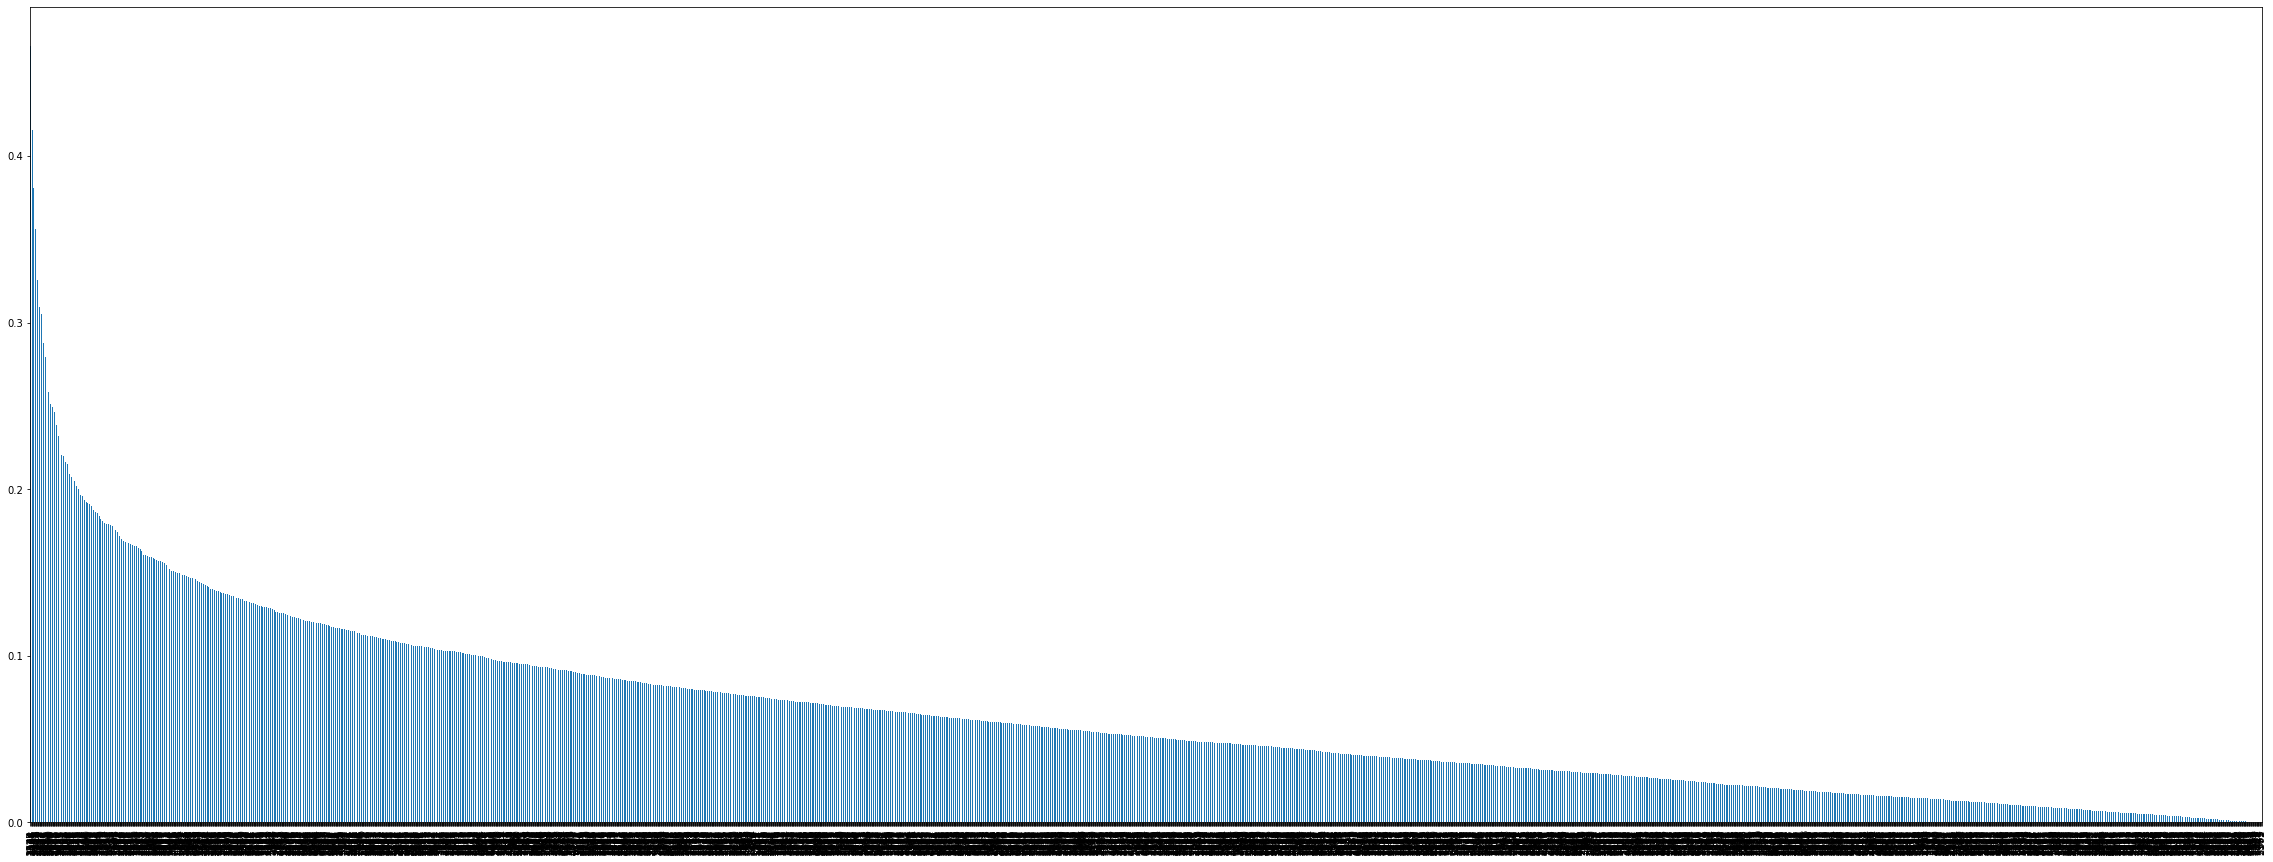

In [20]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [21]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_2]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_2):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  HG2320-HT2416_at
Selected Feature 2 is :  L13761_rna1_at
Selected Feature 3 is :  U34880_at
Selected Feature 4 is :  X74330_at
Selected Feature 5 is :  D89016_at
Selected Feature 6 is :  D83657_at
Selected Feature 7 is :  M14113_at
Selected Feature 8 is :  M74525_at
Selected Feature 9 is :  D86519_at
Selected Feature 10 is :  L07548_at
Selected Feature 11 is :  U79257_at
Selected Feature 12 is :  M55671_at
Selected Feature 13 is :  L01087_at
Selected Feature 14 is :  HG2280-HT2376_at
Selected Feature 15 is :  D87116_at
Selected Feature 16 is :  AB000460_at
Selected Feature 17 is :  X74801_at
Selected Feature 18 is :  U90905_at
Selected Feature 19 is :  D45248_at
Selected Feature 20 is :  X76105_at
Selected Feature 21 is :  U52153_at
Selected Feature 22 is :  U16861_at
Selected Feature 23 is :  D80006_at
Selected Feature 24 is :  X56932_at
Selected Feature 25 is :  L38933_rna1_at
Selected Feature 26 is :  X70649_at
Selected Feature 27 is :  D83777_at
Selected Fe

Selected Feature 956 is :  J04177_at
Selected Feature 957 is :  U23143_at
Selected Feature 958 is :  X52966_at
Selected Feature 959 is :  D14660_at
Selected Feature 960 is :  X51466_at
Selected Feature 961 is :  D00017_at
Selected Feature 962 is :  U43077_at
Selected Feature 963 is :  S81083_cds1_at
Selected Feature 964 is :  D28476_at
Selected Feature 965 is :  K03430_at
Selected Feature 966 is :  U09860_at
Selected Feature 967 is :  S78569_at
Selected Feature 968 is :  D63881_at
Selected Feature 969 is :  M95724_at
Selected Feature 970 is :  D38553_at
Selected Feature 971 is :  HG3214-HT3391_at
Selected Feature 972 is :  M29204_at
Selected Feature 973 is :  U91932_at
Selected Feature 974 is :  M24439_at
Selected Feature 975 is :  M35128_at
Selected Feature 976 is :  U25029_at
Selected Feature 977 is :  M95167_at
Selected Feature 978 is :  U79285_at
Selected Feature 979 is :  U05340_at
Selected Feature 980 is :  X52151_at
Selected Feature 981 is :  U88871_at
Selected Feature 982 is : 

In [22]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 1715
['HG2320-HT2416_at', 'L13761_rna1_at', 'U34880_at', 'X74330_at', 'D89016_at', 'D83657_at', 'M14113_at', 'M74525_at', 'D86519_at', 'L07548_at', 'U79257_at', 'M55671_at', 'L01087_at', 'HG2280-HT2376_at', 'D87116_at', 'AB000460_at', 'X74801_at', 'U90905_at', 'D45248_at', 'X76105_at', 'U52153_at', 'U16861_at', 'D80006_at', 'X56932_at', 'L38933_rna1_at', 'X70649_at', 'D83777_at', 'AF000560_at', 'X52773_at', 'U79248_at', 'U34343_at', 'D30655_at', 'L20321_at', 'M19645_at', 'X64044_at', 'X62654_rna1_at', 'AD000092_cds1_at', 'S67325_at', 'M95623_cds1_at', 'U66669_at', 'D82060_at', 'D16227_at', 'HG3432-HT3621_at', 'U18548_at', 'X81788_at', 'D14659_at', 'D50915_at', 'M60092_at', 'D63391_at', 'X02874_at', 'J04102_at', 'U65093_at', 'D38500_at', 'X63753_at', 'D86960_at', 'M35296_at', 'M16282_at', 'X77197_at', 'U85707_at', 'M64673_at', 'HG3432-HT3618_at', 'X68242_at', 'D38548_at', 'U20285_at', 'M30185_at', 'M79462_at', 'U35139_at', 'S74221_at', 'U77735_at', 'D86972_

In [23]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,HG2320-HT2416_at,L13761_rna1_at,U34880_at,X74330_at,D89016_at,D83657_at,M14113_at,M74525_at,D86519_at,L07548_at,...,M16279_at,V00503_at,HG363-HT363_at,D78156_at,U07681_at,S78085_at,U09117_at,X02750_at,U72517_at,U44378_at
55,-0.126293,-1.616383,0.404500,-0.560659,0.098594,0.801240,-0.419420,-0.047371,-1.071745,0.363254,...,-1.002777,-0.045241,-0.726720,-0.323309,0.103038,0.017246,-0.528664,-0.865761,-0.468653,-0.003885
70,1.819939,0.465335,-0.261722,-0.304272,0.151649,-0.535531,2.962671,1.236650,0.178238,1.333906,...,-0.748494,0.664023,1.628479,1.142150,1.455280,1.326445,2.468986,0.298898,2.250548,0.746368
62,-0.116674,1.228631,0.792119,0.552600,0.424883,-0.007591,1.250399,-0.502128,0.876146,1.949441,...,1.077716,-0.649429,-0.128176,-0.932038,1.219568,-0.070817,-0.379549,-0.587356,-0.164065,0.898962
43,2.618311,-0.026182,-0.709907,-2.031510,4.305864,-0.542300,0.726812,2.493920,2.709456,1.475952,...,0.671991,0.821637,1.414117,-0.064036,1.008668,1.831338,-0.127369,-0.076948,3.290568,0.771800
4,-0.639303,1.263327,0.109747,-0.007403,-0.264833,0.129470,-0.759044,-0.341625,-0.238423,0.268557,...,0.097039,0.690292,-0.030739,0.837786,0.593070,-0.349682,-1.118545,-0.912162,-0.973670,1.140569


# Selection of features using F Classification 

In [24]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:  # Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i] # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train2, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :27.451347827911377 seconds


In [25]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 1487


In [26]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['U41515_at', 'X66079_at', 'L77886_at', 'X52056_at', 'U07559_at', 'U79266_at', 'HG4036-HT4306_at', 'U58048_at', 'D26069_at', 'U50531_at', 'D63482_at', 'AFFX-HUMGAPDH/M33197_3_st', 'M35128_at', 'D83778_at', 'M95627_at', 'D87449_at', 'U61538_at', 'U18009_at', 'D86519_at', 'L20861_at', 'D78361_at', 'D50918_at', 'S77415_at', 'U83463_at', 'X69391_at', 'D80009_at', 'M95724_at', 'L41067_at', 'D64154_at', 'M81118_at', 'M29204_at', 'D21852_at', 'L36922_at', 'M11147_at', 'D87469_at', 'X67325_at', 'X02596_at', 'X13238_at', 'M36200_at', 'L13852_at', 'HG1205-HT1205_at', 'X80909_at', 'M85169_at', 'M22538_at', 'M63138_at', 'HG3175-HT3352_at', 'U18242_at', 'U79267_at', 'HG1869-HT1904_at', 'M68874_at', 'D16227_at', 'X79781_at', 'U25435_at', 'S82592_at', 'U92015_at', 'D28416_at', 'D79995_at', 'X13444_at', 'L17328_at', 'HG3214-HT3391_at', 'L27841_at', 'U38810_at', 'S72487_at', 'M13143_at', 'X51956_rna1_at', 'M85276_at', 'X55668_at', 'U91931_at', 'M29696_at', 'M985

In [27]:
required_features_fc = selected_features_fc[:number_of_features_required_3]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 977


In [28]:
X_train3 = X_train[required_features_fc]
X_train3.head()

,U41515_at,X66079_at,L77886_at,X52056_at,U07559_at,U79266_at,HG4036-HT4306_at,U58048_at,D26069_at,U50531_at,...,U86529_at,D28124_at,AFFX-HUMRGE/M10098_5_at,L32977_at,D14710_at,U51166_at,X80692_at,X56465_at,L20971_at,U31501_at
55,-0.587638,0.221280,-0.622369,-0.128270,-0.293074,0.900591,-0.641995,-0.869555,-0.947209,-0.131433,...,-0.750119,-0.704515,-0.591473,-0.718798,-0.051291,-0.299593,-1.027419,-1.316639,-0.765439,-0.323868
70,-0.320718,0.276986,-0.005308,1.460125,0.540279,2.326261,4.165822,1.888783,1.187031,2.855736,...,1.578543,0.706262,-0.582914,-1.045882,-0.968851,-1.006207,-0.320152,-0.900858,-0.565124,1.648310
62,0.895940,-0.444107,0.034502,0.075179,0.200765,-0.011668,-0.607095,-1.029652,0.800452,3.060961,...,-0.511782,0.158126,-0.571146,0.328666,1.045516,1.157800,-0.565806,-0.406416,-0.633340,0.536594
43,-0.531771,0.475055,0.177820,-0.935533,1.054695,0.098651,3.032164,1.638632,0.816560,-1.305778,...,0.918235,0.978832,1.656869,-0.586375,0.343052,-0.551955,-0.725076,0.380196,-0.480667,0.089153
4,1.330461,1.514915,-0.586539,0.064913,-0.498840,-0.062585,-0.692540,-0.275862,-0.069352,0.598257,...,0.023497,-0.357062,-0.274163,-0.408929,1.303722,1.813942,-0.158183,0.425145,-0.449266,-0.730006


In [29]:
X_test3 = X_test[required_features_fc]
X_test3.head()

,U41515_at,X66079_at,L77886_at,X52056_at,U07559_at,U79266_at,HG4036-HT4306_at,U58048_at,D26069_at,U50531_at,...,U86529_at,D28124_at,AFFX-HUMRGE/M10098_5_at,L32977_at,D14710_at,U51166_at,X80692_at,X56465_at,L20971_at,U31501_at
26,-0.727305,1.326131,0.118104,-1.430157,0.694604,-2.536293,2.122350,-0.052393,-0.431770,-0.473475,...,0.597848,1.476049,1.152768,-0.684368,-0.250050,-0.135557,-0.071799,-0.631163,-0.423279,0.471198
27,-0.984914,-0.804653,-0.343696,0.502608,-0.395957,0.959994,2.189743,0.451246,-0.069352,-0.872524,...,0.320441,-1.090906,-0.441056,-0.567836,0.323085,-0.835863,-0.087996,-0.889621,-0.535889,0.054735
48,-0.575223,-0.487434,-0.562653,-0.502504,-1.280752,-0.389301,0.299110,-1.526620,-1.599562,-0.883926,...,-1.250234,-0.713501,-0.486630,-0.881678,-0.520508,-0.457319,-0.949134,1.357842,0.467854,-0.093265
22,-0.826624,-0.427085,0.297251,-1.222975,-0.169614,2.640248,-0.118491,-1.273133,-0.343179,-0.313855,...,-0.453175,-0.276190,3.228654,-0.128193,0.105720,-0.444701,0.303430,0.256585,-0.663658,-0.609542
30,-0.792483,-0.385305,-0.136682,1.013097,0.756334,-1.208213,-0.274940,0.261130,-0.335125,-0.370862,...,1.222992,1.176521,-0.081809,0.098250,-0.617619,-0.444701,1.013397,0.492569,0.238303,-0.847029


In [30]:
X_test3.shape

(15, 977)

In [31]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [32]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 100.0000
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.2281
Testing accuracy on selected features for 2 neighbors: 86.6667
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.2281
Testing accuracy on selected features for 3 neighbors: 86.6667
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 87.7193
Testing accuracy on selected features for 4 neighbors: 86.6667
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 89.4737
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 85.9649
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy o

In [33]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [0 8]]
Average Confusion matrix is : [[7.         0.        ]
 [4.57894737 3.42105263]]


Confusion Matrix of KNN Classifier:


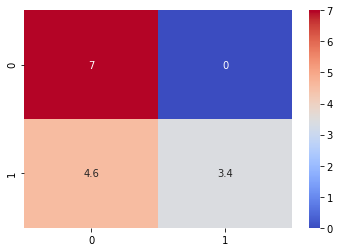

In [34]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [35]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 1.0
Average F-Score is : 0.7654192240146287


# SVM(Support Vector Machine)

In [36]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.2456
Testing accuracy on selected features: 80.0000


In [37]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


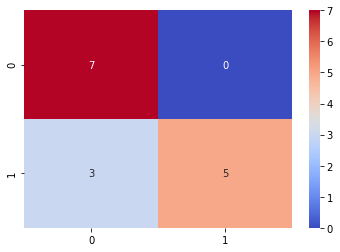

In [38]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [39]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
